In [6]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools
import math
from statsmodels.stats import power
os.chdir("saved_experiments/exp1")

In [8]:
def load_file(start_index, end_index):
    df_list = []
    for i in range(start_index, end_index+1):
        name_of_file = "exp"+str(i)+".txt"
        column_name = "overhead"+str(i)
        df_temp = pd.read_csv(name_of_file)["overhead"].to_frame()
        df_temp.columns.values[0] = column_name
        df_list.append(df_temp)
    df = pd.concat(df_list, axis=1)
    df.to_csv(path_or_buf="combined.csv", index= False)
    del df_list
    
    return df
df = load_file(1, 4)

In [10]:
df.head()
length = df.shape[0]
print "length =", length

length = 10000


# Plot of Sample Size and Similarity Test with 10000 sample data 

In [12]:
z = df["overhead1"]
result = []
sample_sizes = np.arange(50,length,10)
for samp_size in sample_sizes:
    x = df["overhead1"].sample(samp_size, replace = False)
    p_value = stats.ks_2samp(x, z)[1]
    result.append(p_value)
    

In [13]:
result[:10], sample_sizes[:10]

([0.48001786676068636,
  0.45561654217108088,
  0.21250823264847191,
  0.92757925666898011,
  0.54081144897098821,
  0.27426343190534447,
  0.96771868129013927,
  0.10142606816298728,
  0.39812540815755132,
  0.57703512192851691],
 array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140]))

In [14]:
len(sample_sizes)

995

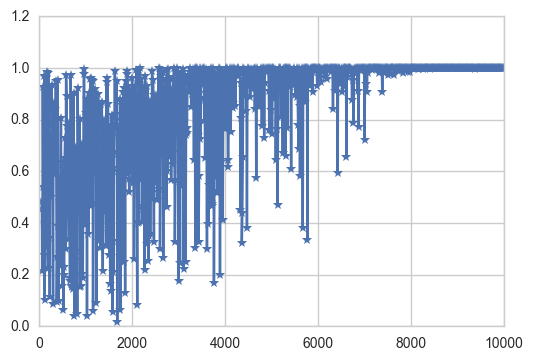

In [15]:
plt.plot(sample_sizes, result, "-*")

In [16]:
new_df = pd.DataFrame()
new_df["x"] = sample_sizes
new_df["y"] = result

Here we can see that if we want to have a confidence level over 90%, we need to set sample size around <b>6000<b>

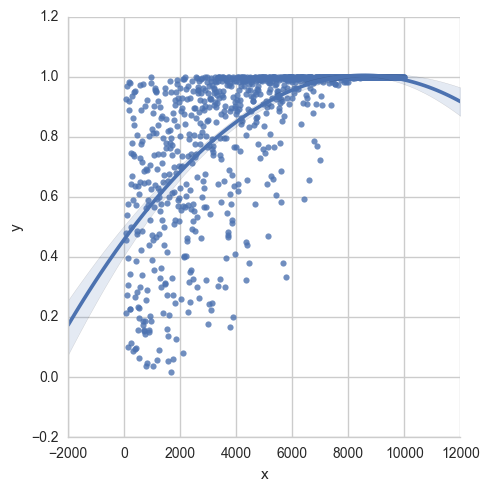

In [17]:
title = 'p values between data with sample size and whole data '
ax = sns.lmplot(x ="x", y = "y", data= new_df, order=2)
plt.savefig(title+'.png')

## Sample Size  Calculation with respect to $\alpha$ : significance level and 1-$\beta$: power of the test 

In [19]:
data1 = df["overhead1"]
data2 = df["overhead2"]
var1 =np.var(data1)
var2 =np.var(data2)
mean1 = np.mean(data1)
mean2 = np.mean(data2)
sens1 = var1/8
print sens1
16*4*var1*var1 / (sens1 * sens1)


0.460890720489


4096.0

In [24]:
var1, var2, mean1, mean2

(3.687125763914008, 3.2329098621930106, 2.1891763915229707, 2.1313909982358177)

In [22]:
effect_size = np.abs(mean1 - mean2)/ np.sqrt(var1*var2)
print effect_size

0.0167369878093


In [26]:
print(power.tt_ind_solve_power(effect_size = 0.01, alpha =0.05, power=0.8))

156978.17286
